In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('diabetes.csv')

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [57]:
df.shape

(768, 9)

In [58]:
#all values are numeric

In [59]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Overview:

In [60]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


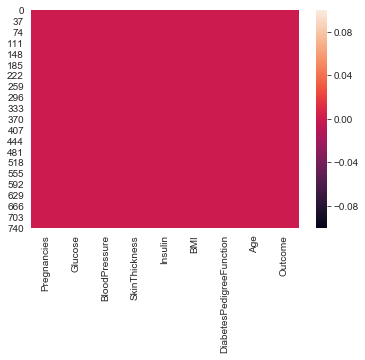

In [62]:
sns.heatmap(df.isnull())

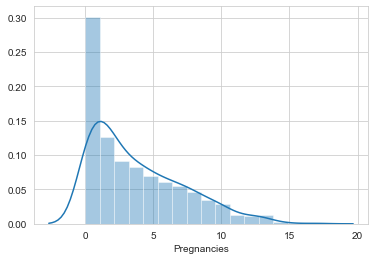

In [63]:
sns.distplot(df['Pregnancies'])

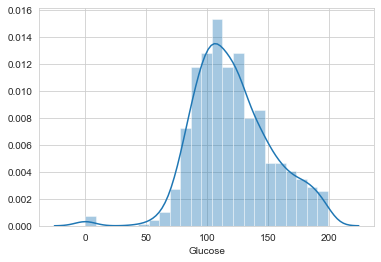

In [64]:
sns.distplot(df['Glucose'])

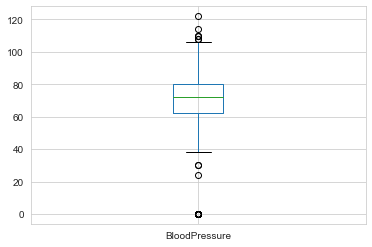

In [65]:
df['BloodPressure'].plot.box()

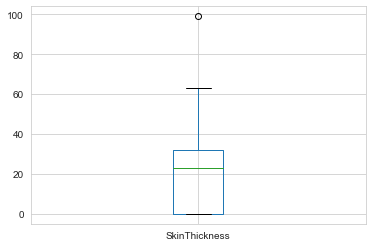

In [66]:
df['SkinThickness'].plot.box()

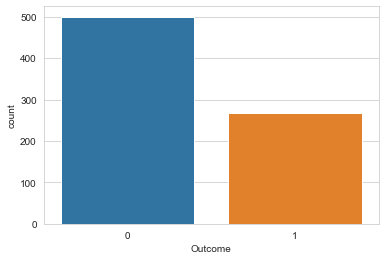

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)

In [68]:
#as it shows persons having diabetes is around 260-270
#and persons not having diabetes is around 500

check the the relation b/w Outcome and other variables

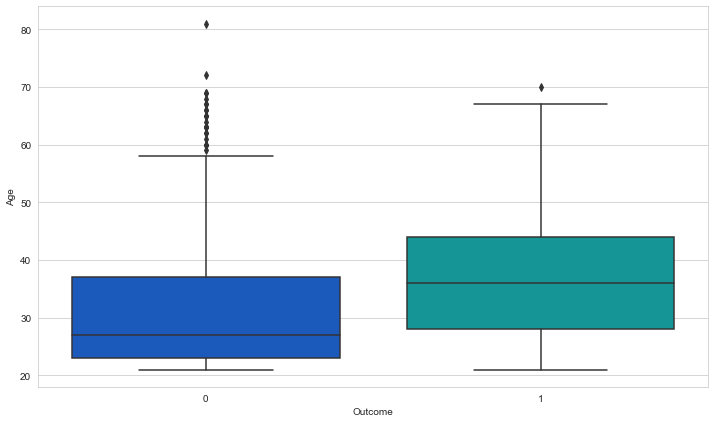

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outcome',y='Age',data=df,palette='winter')

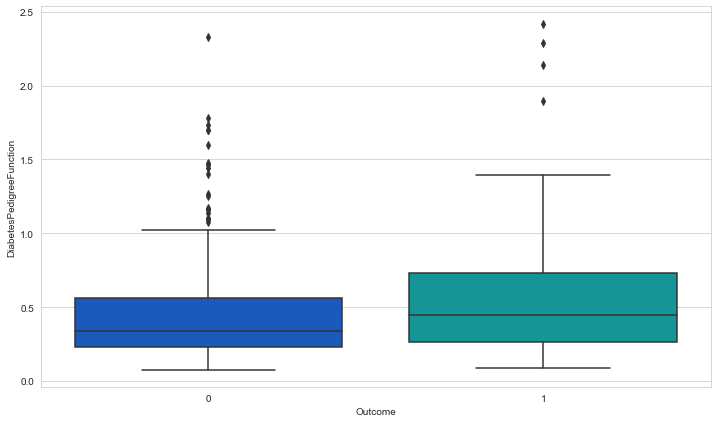

In [70]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,palette='winter')

In [71]:
collist=df.columns.values
ncol=9
nrows=10

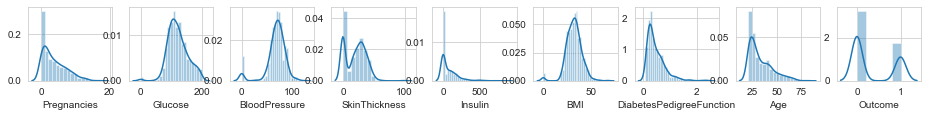

In [72]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

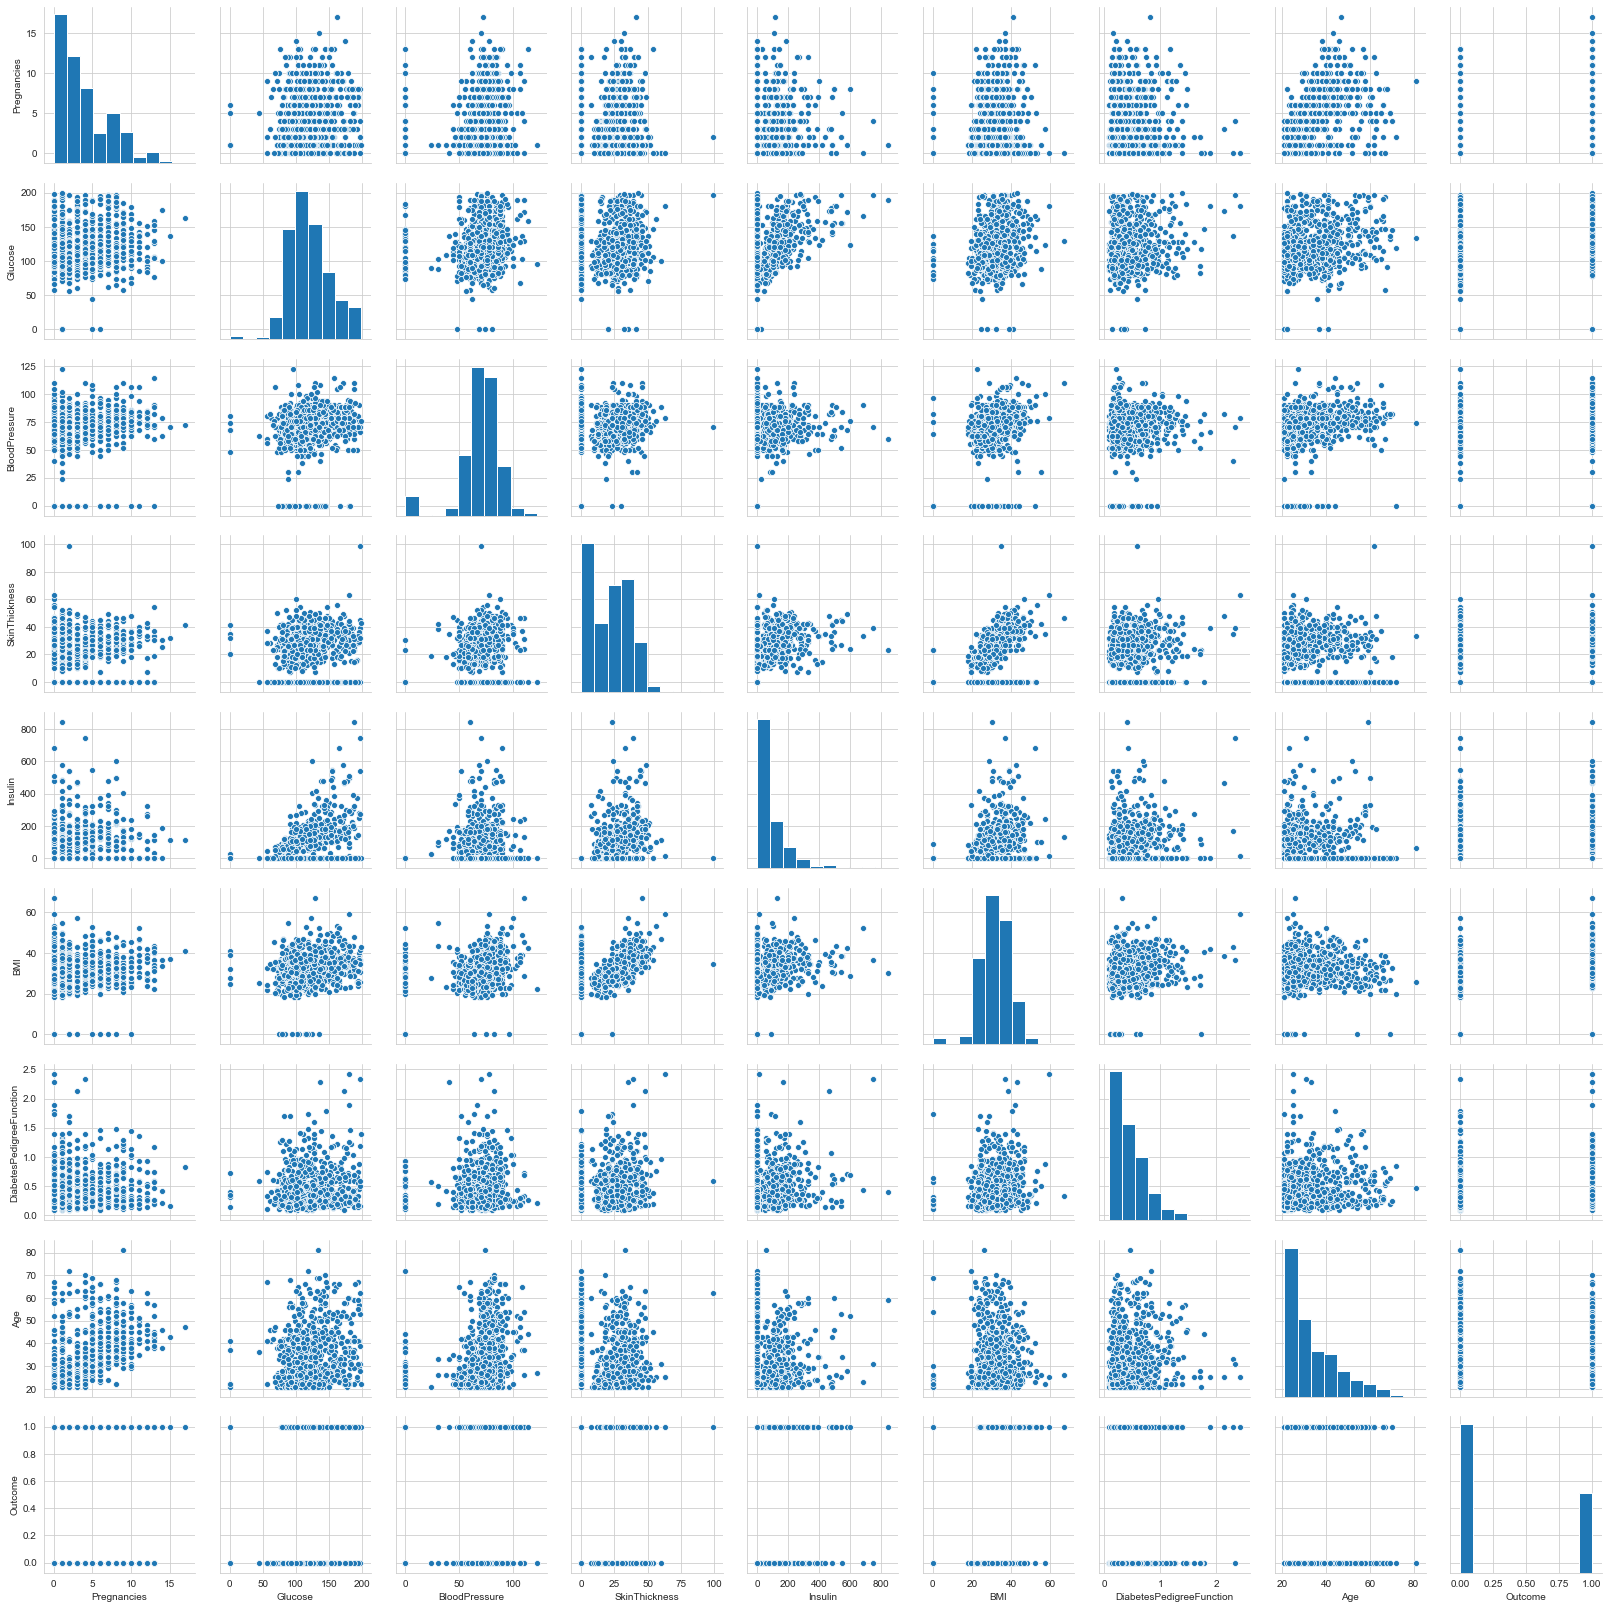

In [73]:
sns.pairplot(df)

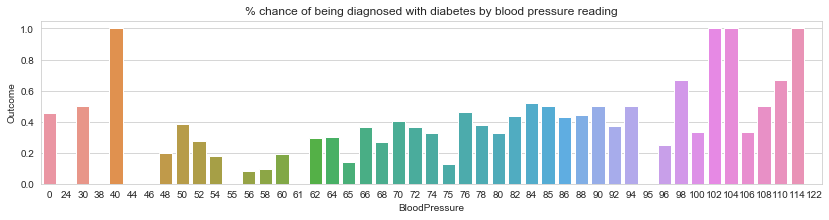

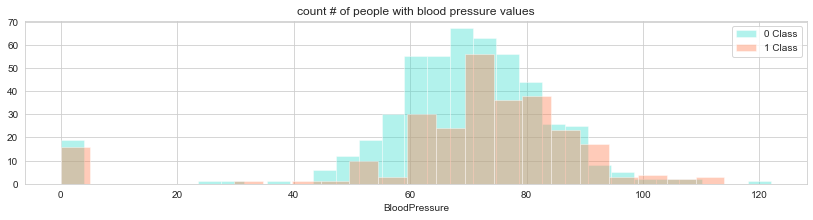

In [74]:
plt.figure(figsize=(14,3))
bp_pivot = df.groupby('BloodPressure').Outcome.mean().reset_index()
sns.barplot(bp_pivot.BloodPressure, bp_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = df.groupby('BloodPressure').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df.Outcome == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()

In [75]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [76]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [77]:
z[4][6]

5.484909100466951

In [78]:
z[7][2]

3.572597239872642

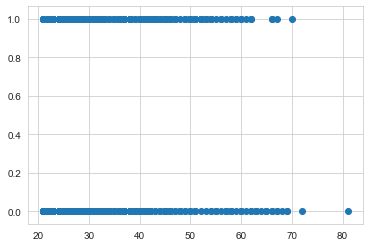

In [79]:
plt.scatter(df['Age'],df['Outcome'])
plt.show()

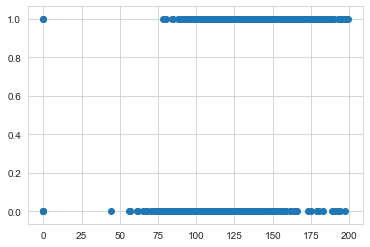

In [80]:
plt.scatter(df['Glucose'],df['Outcome'])
plt.show()

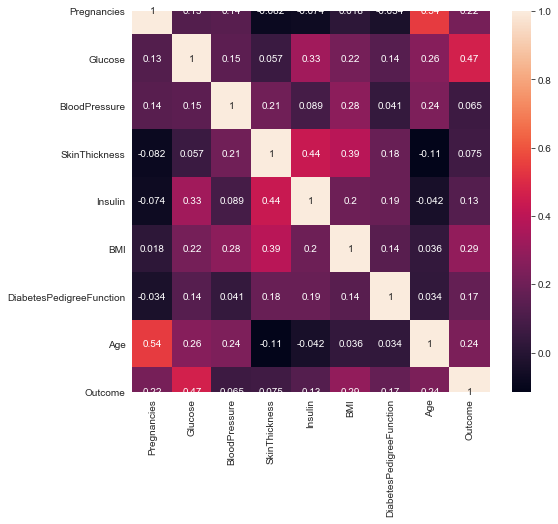

In [81]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [82]:
df_new=df[(z<3).all(axis=1)]

In [83]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df_new.shape

(688, 9)

In [85]:
df.shape

(768, 9)

In [86]:
#previously we have 768 rows but now we are left with only 688 rows

In [87]:
df=df_new

In [88]:
df.shape

(688, 9)

In [89]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [90]:
x.shape

(688, 8)

In [91]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [92]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [119]:
x_train.shape

(460, 8)

In [120]:
x_test.shape

(228, 8)

In [121]:
y_train.shape

(460,)

In [122]:
y_test.shape

(228,)

In [123]:
lg=LogisticRegression()

In [124]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.7982456140350878
[[142  11]
 [ 35  40]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       153
           1       0.78      0.53      0.63        75

    accuracy                           0.80       228
   macro avg       0.79      0.73      0.75       228
weighted avg       0.80      0.80      0.79       228



In [126]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7763157894736842
[[133  20]
 [ 31  44]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       153
           1       0.69      0.59      0.63        75

    accuracy                           0.78       228
   macro avg       0.75      0.73      0.74       228
weighted avg       0.77      0.78      0.77       228



In [132]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8070175438596491
[[143  10]
 [ 34  41]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       153
           1       0.80      0.55      0.65        75

    accuracy                           0.81       228
   macro avg       0.81      0.74      0.76       228
weighted avg       0.81      0.81      0.80       228



In [133]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6666666666666666
[[121  32]
 [ 44  31]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       153
           1       0.49      0.41      0.45        75

    accuracy                           0.67       228
   macro avg       0.61      0.60      0.61       228
weighted avg       0.65      0.67      0.66       228



In [134]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7894736842105263
[[138  15]
 [ 33  42]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       153
           1       0.74      0.56      0.64        75

    accuracy                           0.79       228
   macro avg       0.77      0.73      0.74       228
weighted avg       0.78      0.79      0.78       228



In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7894736842105263
[[145   8]
 [ 40  35]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       153
           1       0.81      0.47      0.59        75

    accuracy                           0.79       228
   macro avg       0.80      0.71      0.73       228
weighted avg       0.79      0.79      0.77       228

